In [1]:
# Import necessary libraries for ensemble classifiers
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


In [2]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

# Tr·ª±c quan h√≥a c∆° b·∫£n
import matplotlib.pyplot as plt
import seaborn as sns

# X·ª≠ l√Ω ng√¥n ng·ªØ t·ª± nhi√™n
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Machine Learning c∆° b·∫£n
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

In [3]:
# Load d·ªØ li·ªáu
print("ƒêang load d·ªØ li·ªáu...")
df = pd.read_csv('reviews.csv')

print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {df.shape}")
print(f"T·ªïng s·ªë ƒë√°nh gi√°: {len(df):,}")
print("\nC√°c c·ªôt trong dataset:")
print(df.columns.tolist())

# Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n
print("\nTh√¥ng tin c∆° b·∫£n:")
df.info()

print("\nM·∫´u d·ªØ li·ªáu ƒë·∫ßu ti√™n:")
df.head()


ƒêang load d·ªØ li·ªáu...
K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (568454, 10)
T·ªïng s·ªë ƒë√°nh gi√°: 568,454

C√°c c·ªôt trong dataset:
['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

Th√¥ng tin c∆° b·∫£n:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

Ki·ªÉm tra missing values:
ProfileName    26
Summary        27
dtype: int64

Th·ªëng k√™ ƒë·ªô d√†i text trong c·ªôt 'Text':


count    568454.000000
mean        436.222083
std         445.339741
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: text_length, dtype: float64


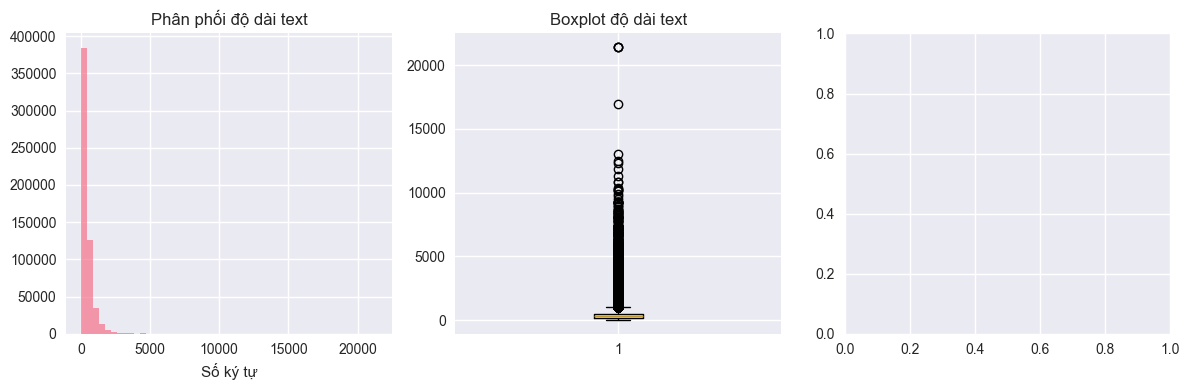


C√°c c·ªôt c√≥ th·ªÉ ch·ª©a text ƒë·ªÉ ph√¢n t√≠ch:
['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text']


In [4]:
# Kh√°m ph√° d·ªØ li·ªáu chi ti·∫øt
print("Ki·ªÉm tra missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Th·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt s·ªë
if 'reviews.rating' in df.columns:
    print(f"\nPh√¢n ph·ªëi rating:")
    print(df['reviews.rating'].value_counts().sort_index())
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df['reviews.rating'].hist(bins=10, alpha=0.7)
    plt.title('Ph√¢n ph·ªëi Rating')
    plt.xlabel('Rating')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    
    plt.subplot(1, 2, 2)
    df['reviews.rating'].value_counts().sort_index().plot(kind='bar')
    plt.title('Rating theo t·ª´ng m·ª©c')
    plt.xlabel('Rating')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Ki·ªÉm tra ƒë·ªô d√†i review text
text_columns = [col for col in df.columns if 'text' in col.lower() or 'review' in col.lower()]
if text_columns:
    text_col = text_columns[0]
    print(f"\nTh·ªëng k√™ ƒë·ªô d√†i text trong c·ªôt '{text_col}':")
    df['text_length'] = df[text_col].astype(str).str.len()
    print(df['text_length'].describe())
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    df['text_length'].hist(bins=50, alpha=0.7)
    plt.title('Ph√¢n ph·ªëi ƒë·ªô d√†i text')
    plt.xlabel('S·ªë k√Ω t·ª±')
    
    plt.subplot(1, 3, 2)
    plt.boxplot(df['text_length'].dropna())
    plt.title('Boxplot ƒë·ªô d√†i text')
    
    plt.subplot(1, 3, 3)
    if 'reviews.rating' in df.columns:
        df.groupby('reviews.rating')['text_length'].mean().plot(kind='bar')
        plt.title('ƒê·ªô d√†i text theo rating')
        plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

print("\nC√°c c·ªôt c√≥ th·ªÉ ch·ª©a text ƒë·ªÉ ph√¢n t√≠ch:")
print([col for col in df.columns if df[col].dtype == 'object'][:10])


In [5]:
# Download NLTK data n·∫øu c·∫ßn
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Kh·ªüi t·∫°o c√°c c√¥ng c·ª•
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
analyzer = SentimentIntensityAnalyzer()

def clean_text(text):
    """L√†m s·∫°ch v√† chu·∫©n h√≥a text"""
    if pd.isna(text):
        return ""
    
    # Chuy·ªÉn v·ªÅ lowercase
    text = str(text).lower()
    
    # Lo·∫°i b·ªè HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Lo·∫°i b·ªè URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Lo·∫°i b·ªè k√Ω t·ª± ƒë·∫∑c bi·ªát nh∆∞ng gi·ªØ l·∫°i d·∫•u ch·∫•m c√¢u c∆° b·∫£n
    text = re.sub(r'[^a-zA-Z0-9\s!?.,]', '', text)
    
    # Lo·∫°i b·ªè kho·∫£ng tr·∫Øng th·ª´a
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_text(text):
    """Ti·ªÅn x·ª≠ l√Ω text cho machine learning"""
    # L√†m s·∫°ch text
    text = clean_text(text)
    
    # Tokenize
    words = word_tokenize(text)
    
    # Lo·∫°i b·ªè stopwords v√† stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    
    return ' '.join(words)

print("ƒê√£ kh·ªüi t·∫°o c√°c function ti·ªÅn x·ª≠ l√Ω!")


ƒê√£ kh·ªüi t·∫°o c√°c function ti·ªÅn x·ª≠ l√Ω!


In [6]:
# X√°c ƒë·ªãnh c·ªôt text ch√≠nh ƒë·ªÉ ph√¢n t√≠ch d·ª±a tr√™n c·∫•u tr√∫c dataset
main_text_col = 'reviews.text'
title_col = 'reviews.title'

print("C·∫•u tr√∫c dataset Amazon Reviews ƒë∆∞·ª£c x√°c ƒë·ªãnh:")
print(f"- Text ch√≠nh: {main_text_col}")
print(f"- Ti√™u ƒë·ªÅ: {title_col}")
print(f"- Rating: reviews.rating")
print(f"- Date: reviews.date")
print(f"- Helpfulness: reviews.numHelpful")

if main_text_col in df.columns:
    print(f"S·ª≠ d·ª•ng c·ªôt '{main_text_col}' l√†m text ch√≠nh cho ph√¢n t√≠ch")
    
    # T·∫°o b·∫£n sao ƒë·ªÉ x·ª≠ l√Ω
    df_clean = df.copy()
    
    # Lo·∫°i b·ªè c√°c d√≤ng c√≥ text r·ªóng
    df_clean = df_clean.dropna(subset=[main_text_col])
    df_clean = df_clean[df_clean[main_text_col].str.strip() != '']
    
    print(f"S·ªë d√≤ng sau khi lo·∫°i b·ªè text r·ªóng: {len(df_clean):,}")
    
    # K·∫øt h·ª£p text v√† title ƒë·ªÉ ph√¢n t√≠ch to√†n di·ªán (n·∫øu c√≥ title)
    if title_col in df_clean.columns:
        print("K·∫øt h·ª£p text v√† title ƒë·ªÉ ph√¢n t√≠ch to√†n di·ªán...")
        df_clean['combined_text'] = df_clean[title_col].fillna('') + ' ' + df_clean[main_text_col].fillna('')
        analysis_text_col = 'combined_text'
    else:
        analysis_text_col = main_text_col
    
    # √Åp d·ª•ng ti·ªÅn x·ª≠ l√Ω
    print("ƒêang ti·ªÅn x·ª≠ l√Ω text...")
    df_clean['text_cleaned'] = df_clean[analysis_text_col].apply(clean_text)
    df_clean['text_processed'] = df_clean[analysis_text_col].apply(preprocess_text)
    
    # Hi·ªÉn th·ªã v√≠ d·ª•
    print("\nV√≠ d·ª• text tr∆∞·ªõc v√† sau ti·ªÅn x·ª≠ l√Ω:")
    for i in range(min(3, len(df_clean))):
        if title_col in df_clean.columns:
            print(f"\nTitle: {df_clean[title_col].iloc[i]}")
            print(f"Text: {df_clean[main_text_col].iloc[i][:150]}...")
        else:
            print(f"\nOriginal: {df_clean[main_text_col].iloc[i][:200]}...")
        print(f"Cleaned:  {df_clean['text_cleaned'].iloc[i][:200]}...")
        print(f"Processed: {df_clean['text_processed'].iloc[i][:200]}...")
        print("-" * 50)
    
    # C·∫≠p nh·∫≠t th·ªëng k√™ ƒë·ªô d√†i sau x·ª≠ l√Ω
    df_clean['clean_text_length'] = df_clean['text_cleaned'].str.len()
    df_clean['processed_text_length'] = df_clean['text_processed'].str.len()
    
    print(f"\nTh·ªëng k√™ ƒë·ªô d√†i text sau x·ª≠ l√Ω:")
    print(f"Text cleaned - Trung b√¨nh: {df_clean['clean_text_length'].mean():.1f}, Median: {df_clean['clean_text_length'].median():.1f}")
    print(f"Text processed - Trung b√¨nh: {df_clean['processed_text_length'].mean():.1f}, Median: {df_clean['processed_text_length'].median():.1f}")
    
else:
    print("Kh√¥ng t√¨m th·∫•y c·ªôt text ph√π h·ª£p!")


C·∫•u tr√∫c dataset Amazon Reviews ƒë∆∞·ª£c x√°c ƒë·ªãnh:
- Text ch√≠nh: reviews.text
- Ti√™u ƒë·ªÅ: reviews.title
- Rating: reviews.rating
- Date: reviews.date
- Helpfulness: reviews.numHelpful
Kh√¥ng t√¨m th·∫•y c·ªôt text ph√π h·ª£p!


In [7]:
def analyze_sentiment_multidimensional(text):
    """Ph√¢n t√≠ch c·∫£m x√∫c ƒëa chi·ªÅu"""
    
    # VADER Sentiment
    vader_scores = analyzer.polarity_scores(text)
    
    # TextBlob Sentiment
    blob = TextBlob(text)
    textblob_polarity = blob.sentiment.polarity
    textblob_subjectivity = blob.sentiment.subjectivity
    
    # Ph√¢n lo·∫°i c·∫£m x√∫c d·ª±a tr√™n VADER
    if vader_scores['compound'] >= 0.05:
        sentiment_label = 'Positive'
    elif vader_scores['compound'] <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    # ƒê·ªô m·∫°nh c·∫£m x√∫c
    emotion_intensity = abs(vader_scores['compound'])
    
    return {
        'sentiment_label': sentiment_label,
        'vader_compound': vader_scores['compound'],
        'vader_positive': vader_scores['pos'],
        'vader_negative': vader_scores['neg'],
        'vader_neutral': vader_scores['neu'],
        'textblob_polarity': textblob_polarity,
        'textblob_subjectivity': textblob_subjectivity,
        'emotion_intensity': emotion_intensity
    }

# √Åp d·ª•ng ph√¢n t√≠ch c·∫£m x√∫c
print("ƒêang ph√¢n t√≠ch c·∫£m x√∫c...")
sentiment_results = df_clean['text_cleaned'].apply(analyze_sentiment_multidimensional)

# Chuy·ªÉn k·∫øt qu·∫£ th√†nh DataFrame
sentiment_df = pd.DataFrame(sentiment_results.tolist())

# K·∫øt h·ª£p v·ªõi dataframe g·ªëc
df_analysis = pd.concat([df_clean.reset_index(drop=True), sentiment_df], axis=1)

print(f"Ho√†n th√†nh ph√¢n t√≠ch c·∫£m x√∫c cho {len(df_analysis):,} ƒë√°nh gi√°")

# Hi·ªÉn th·ªã th·ªëng k√™ c·∫£m x√∫c
print("\nPh√¢n ph·ªëi c·∫£m x√∫c:")
print(df_analysis['sentiment_label'].value_counts())

print("\nTh·ªëng k√™ ƒëi·ªÉm c·∫£m x√∫c:")
print(df_analysis[['vader_compound', 'textblob_polarity', 'emotion_intensity']].describe())


ƒêang ph√¢n t√≠ch c·∫£m x√∫c...


NameError: name 'df_clean' is not defined

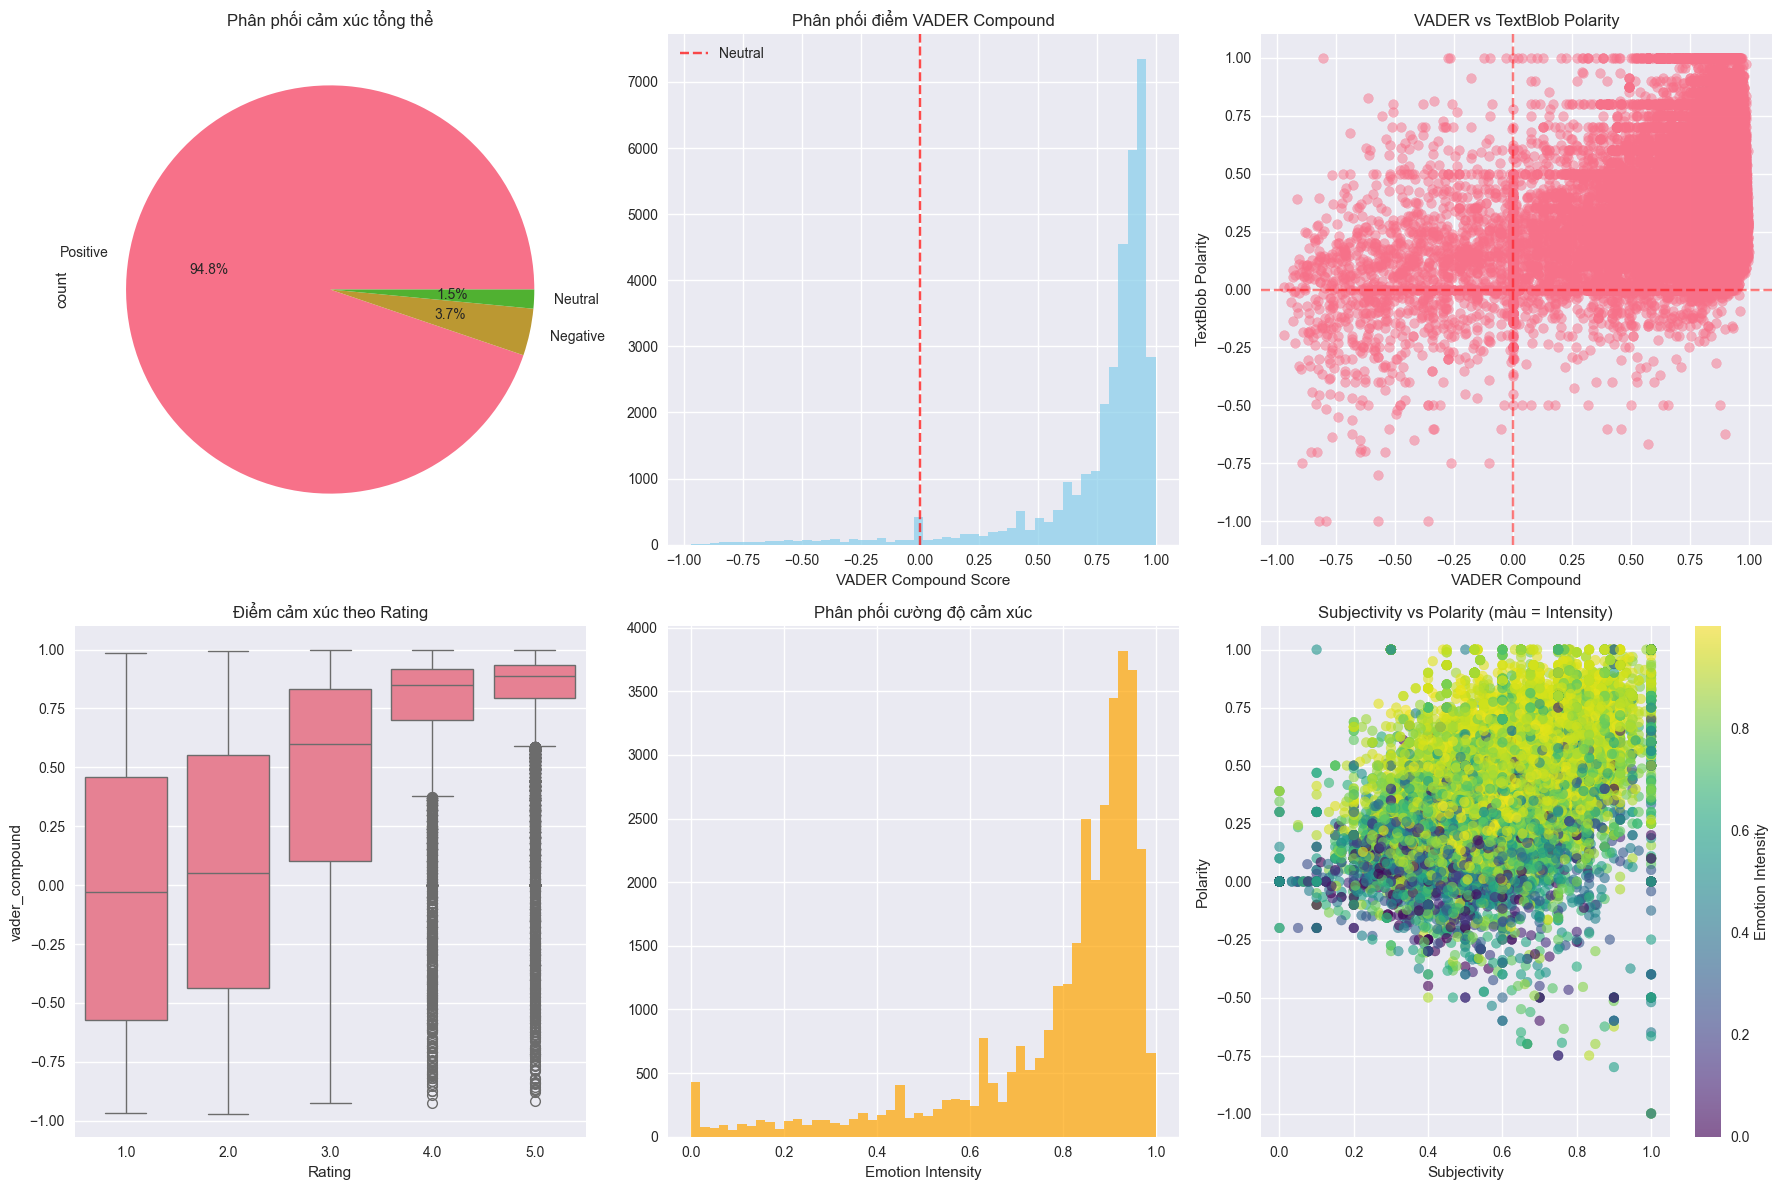


M·∫´u k·∫øt qu·∫£ ph√¢n t√≠ch c·∫£m x√∫c:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text_cleaned  reviews.rating sentiment_label  vader_compound  textblob_polarity  emotion_intensity
0                                                                                                                                                                                                                                   

In [ ]:
# Visualize ph√¢n t√≠ch c·∫£m x√∫c
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Ph√¢n ph·ªëi c·∫£m x√∫c
df_analysis['sentiment_label'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Ph√¢n ph·ªëi c·∫£m x√∫c t·ªïng th·ªÉ')

# 2. Histogram ƒëi·ªÉm VADER
axes[0,1].hist(df_analysis['vader_compound'], bins=50, alpha=0.7, color='skyblue')
axes[0,1].set_title('Ph√¢n ph·ªëi ƒëi·ªÉm VADER Compound')
axes[0,1].set_xlabel('VADER Compound Score')
axes[0,1].axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0,1].legend()

# 3. Scatter plot VADER vs TextBlob
axes[0,2].scatter(df_analysis['vader_compound'], df_analysis['textblob_polarity'], alpha=0.5)
axes[0,2].set_title('VADER vs TextBlob Polarity')
axes[0,2].set_xlabel('VADER Compound')
axes[0,2].set_ylabel('TextBlob Polarity')
axes[0,2].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0,2].axvline(x=0, color='red', linestyle='--', alpha=0.5)

# 4. Boxplot c·∫£m x√∫c theo rating (n·∫øu c√≥)
if 'reviews.rating' in df_analysis.columns:
    sns.boxplot(data=df_analysis, x='reviews.rating', y='vader_compound', ax=axes[1,0])
    axes[1,0].set_title('ƒêi·ªÉm c·∫£m x√∫c theo Rating')
    axes[1,0].set_xlabel('Rating')
else:
    axes[1,0].text(0.5, 0.5, 'Kh√¥ng c√≥ c·ªôt rating', ha='center', va='center', transform=axes[1,0].transAxes)

# 5. Emotion intensity distribution
axes[1,1].hist(df_analysis['emotion_intensity'], bins=50, alpha=0.7, color='orange')
axes[1,1].set_title('Ph√¢n ph·ªëi c∆∞·ªùng ƒë·ªô c·∫£m x√∫c')
axes[1,1].set_xlabel('Emotion Intensity')

# 6. Subjectivity vs Polarity
scatter = axes[1,2].scatter(df_analysis['textblob_subjectivity'], df_analysis['textblob_polarity'], 
                           c=df_analysis['emotion_intensity'], cmap='viridis', alpha=0.6)
axes[1,2].set_title('Subjectivity vs Polarity (m√†u = Intensity)')
axes[1,2].set_xlabel('Subjectivity')
axes[1,2].set_ylabel('Polarity')
plt.colorbar(scatter, ax=axes[1,2], label='Emotion Intensity')

plt.tight_layout()
plt.show()

# Hi·ªÉn th·ªã m·∫´u k·∫øt qu·∫£
print("\nM·∫´u k·∫øt qu·∫£ ph√¢n t√≠ch c·∫£m x√∫c:")
sample_cols = ['text_cleaned', 'sentiment_label', 'vader_compound', 'textblob_polarity', 'emotion_intensity']
if 'reviews.rating' in df_analysis.columns:
    sample_cols.insert(1, 'reviews.rating')
    
print(df_analysis[sample_cols].head(10).to_string())


In [ ]:
# Ki·ªÉm tra n·∫øu c√≥ c·ªôt rating ƒë·ªÉ d·ª± ƒëo√°n
if 'reviews.rating' in df_analysis.columns:
    
    # Chu·∫©n b·ªã d·ªØ li·ªáu cho m√¥ h√¨nh d·ª± ƒëo√°n rating
    print("Chu·∫©n b·ªã d·ªØ li·ªáu cho m√¥ h√¨nh d·ª± ƒëo√°n rating...")
    
    # Lo·∫°i b·ªè d·ªØ li·ªáu kh√¥ng c√≥ rating
    df_model = df_analysis.dropna(subset=['reviews.rating']).copy()
    
    # T·∫°o features t·ª´ text v√† sentiment
    print("T·∫°o features...")
    
    # TF-IDF Vectorizer
    tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
    tfidf_features = tfidf.fit_transform(df_model['text_processed'])
    
    # Features t·ª´ sentiment analysis
    sentiment_features = df_model[['vader_compound', 'vader_positive', 'vader_negative', 'vader_neutral',
                                  'textblob_polarity', 'textblob_subjectivity', 'emotion_intensity',
                                  'clean_text_length', 'processed_text_length']].values
    
    # K·∫øt h·ª£p features
    from scipy.sparse import hstack
    X = hstack([tfidf_features, sentiment_features])
    y = df_model['reviews.rating'].values
    
    print(f"Shape c·ªßa features: {X.shape}")
    print(f"Ph√¢n ph·ªëi rating ƒë·ªÉ d·ª± ƒëo√°n:")
    print(pd.Series(y).value_counts().sort_index())
    
    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    print(f"Train size: {X_train.shape[0]:,}, Test size: {X_test.shape[0]:,}")
    
else:
    print("Kh√¥ng t√¨m th·∫•y c·ªôt rating - s·∫Ω t·∫°o m√¥ h√¨nh ph√¢n lo·∫°i c·∫£m x√∫c thay th·∫ø")


Chu·∫©n b·ªã d·ªØ li·ªáu cho m√¥ h√¨nh d·ª± ƒëo√°n rating...
T·∫°o features...
Shape c·ªßa features: (34626, 5009)
Ph√¢n ph·ªëi rating ƒë·ªÉ d·ª± ƒëo√°n:
1.0      410
2.0      402
3.0     1499
4.0     8541
5.0    23774
Name: count, dtype: int64
Train size: 27,700, Test size: 6,926


: 

In [ ]:
# Train nhi·ªÅu m√¥ h√¨nh v√† so s√°nh
if 'reviews.rating' in df_analysis.columns:
    
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import LinearRegression
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)  # S·ª≠ d·ª•ng classification
    }
    
    model_results = {}
    
    print("Training c√°c m√¥ h√¨nh...")
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        if name == 'Gradient Boosting':
            # Classification approach
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Accuracy: {accuracy:.4f}")
            
            model_results[name] = {
                'model': model,
                'predictions': y_pred,
                'accuracy': accuracy,
                'type': 'classification'
            }
            
        else:
            # Regression approach
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R¬≤: {r2:.4f}")
            
            model_results[name] = {
                'model': model,
                'predictions': y_pred,
                'mse': mse,
                'mae': mae,
                'r2': r2,
                'type': 'regression'
            }
    
    # Hi·ªÉn th·ªã k·∫øt qu·∫£ t·ªët nh·∫•t
    print("\n" + "="*50)
    print("K·∫æT QU·∫¢ ƒê√ÅNH GI√Å M√î H√åNH")
    print("="*50)
    
    for name, result in model_results.items():
        print(f"\n{name}:")
        if result['type'] == 'classification':
            print(f"  Accuracy: {result['accuracy']:.4f}")
        else:
            print(f"  MSE: {result['mse']:.4f}")
            print(f"  MAE: {result['mae']:.4f}")
            print(f"  R¬≤: {result['r2']:.4f}")
    
else:
    # Fallback: M√¥ h√¨nh ph√¢n lo·∫°i c·∫£m x√∫c
    print("T·∫°o m√¥ h√¨nh ph√¢n lo·∫°i c·∫£m x√∫c...")
    
    # S·ª≠ d·ª•ng sentiment label l√†m target
    le = LabelEncoder()
    y_sentiment = le.fit_transform(df_analysis['sentiment_label'])
    
    # Ch·ªâ s·ª≠ d·ª•ng text features
    tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
    X_sentiment = tfidf.fit_transform(df_analysis['text_processed'])
    
    X_train, X_test, y_train, y_test = train_test_split(X_sentiment, y_sentiment, 
                                                        test_size=0.2, random_state=42, stratify=y_sentiment)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy ph√¢n lo·∫°i c·∫£m x√∫c: {accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))


Training c√°c m√¥ h√¨nh...

Training Linear Regression...
MSE: 0.3888, MAE: 0.4525, R¬≤: 0.2824

Training Random Forest...


In [ ]:
def calculate_helpfulness_score(row):
    """
    T√≠nh ƒëi·ªÉm h·ªØu √≠ch c·ªßa ƒë√°nh gi√° d·ª±a tr√™n nhi·ªÅu y·∫øu t·ªë:
    - ƒê·ªô d√†i text (reviews chi ti·∫øt h∆°n th∆∞·ªùng h·ªØu √≠ch h∆°n)
    - C√¢n b·∫±ng c·∫£m x√∫c (kh√¥ng qu√° thi√™n v·ªÅ 1 chi·ªÅu)
    - ƒê·ªô kh√°ch quan (subjectivity th·∫•p h∆°n)
    - C∆∞·ªùng ƒë·ªô c·∫£m x√∫c v·ª´a ph·∫£i (kh√¥ng qu√° c·ª±c ƒëoan)
    """
    
    score = 0
    
    # 1. ƒêi·ªÉm ƒë·ªô d√†i text (25%)
    text_length = row['clean_text_length']
    if text_length >= 100:
        length_score = min(100, text_length) / 100  # T·ªëi ƒëa 1.0
    else:
        length_score = text_length / 100
    score += length_score * 0.25
    
    # 2. ƒêi·ªÉm c√¢n b·∫±ng c·∫£m x√∫c (25%)
    # Reviews c√≥ c·∫£ positive v√† negative elements th∆∞·ªùng kh√°ch quan h∆°n
    pos_score = row['vader_positive']
    neg_score = row['vader_negative']
    neu_score = row['vader_neutral']
    
    # T√≠nh entropy ƒë·ªÉ ƒëo ƒë·ªô c√¢n b·∫±ng
    scores = [pos_score, neg_score, neu_score]
    scores = [s + 1e-10 for s in scores if s > 0]  # Tr√°nh log(0)
    if len(scores) > 1:
        entropy = -sum(s * np.log(s) for s in scores if s > 0)
        balance_score = min(1.0, entropy / 1.1)  # Normalize
    else:
        balance_score = 0.3
    score += balance_score * 0.25
    
    # 3. ƒêi·ªÉm ƒë·ªô kh√°ch quan (25%)
    # Subjectivity th·∫•p = kh√°ch quan cao
    objectivity_score = 1 - row['textblob_subjectivity']
    score += objectivity_score * 0.25
    
    # 4. ƒêi·ªÉm c∆∞·ªùng ƒë·ªô c·∫£m x√∫c v·ª´a ph·∫£i (25%)
    # C·∫£m x√∫c qu√° m·∫°nh c√≥ th·ªÉ kh√¥ng tin c·∫≠y
    intensity = row['emotion_intensity']
    if intensity <= 0.3:
        intensity_score = intensity / 0.3  # TƒÉng d·∫ßn ƒë·∫øn 0.3
    elif intensity <= 0.7:
        intensity_score = 1.0  # Optimal range
    else:
        intensity_score = max(0.2, (1 - intensity) / 0.3)  # Gi·∫£m sau 0.7
    score += intensity_score * 0.25
    
    return min(1.0, max(0.0, score))  # ƒê·∫£m b·∫£o trong [0,1]

# T√≠nh ƒëi·ªÉm h·ªØu √≠ch cho t·∫•t c·∫£ reviews
print("T√≠nh ƒëi·ªÉm h·ªØu √≠ch cho c√°c ƒë√°nh gi√°...")
df_analysis['helpfulness_score'] = df_analysis.apply(calculate_helpfulness_score, axis=1)

# So s√°nh v·ªõi helpfulness c√≥ s·∫µn (n·∫øu c√≥)
if 'reviews.numHelpful' in df_analysis.columns:
    df_analysis['has_existing_helpful'] = df_analysis['reviews.numHelpful'].notna()
    existing_helpful_data = df_analysis[df_analysis['has_existing_helpful']]
    
    if len(existing_helpful_data) > 0:
        correlation_helpful = existing_helpful_data['reviews.numHelpful'].corr(existing_helpful_data['helpfulness_score'])
        print(f"\nCorrelation v·ªõi reviews.numHelpful c√≥ s·∫µn: {correlation_helpful:.3f}")
        
        print(f"S·ªë reviews c√≥ numHelpful data: {len(existing_helpful_data):,}")
        print(f"Trung b√¨nh numHelpful: {existing_helpful_data['reviews.numHelpful'].mean():.2f}")

# Th·ªëng k√™ ƒëi·ªÉm h·ªØu √≠ch
print("\nTh·ªëng k√™ ƒëi·ªÉm h·ªØu √≠ch t·ª± t√≠nh:")
print(df_analysis['helpfulness_score'].describe())

# Ph√¢n lo·∫°i m·ª©c ƒë·ªô h·ªØu √≠ch
def categorize_helpfulness(score):
    if score >= 0.8:
        return 'R·∫•t h·ªØu √≠ch'
    elif score >= 0.6:
        return 'H·ªØu √≠ch'
    elif score >= 0.4:
        return 'Trung b√¨nh'
    else:
        return '√çt h·ªØu √≠ch'

df_analysis['helpfulness_category'] = df_analysis['helpfulness_score'].apply(categorize_helpfulness)

print("\nPh√¢n ph·ªëi m·ª©c ƒë·ªô h·ªØu √≠ch:")
print(df_analysis['helpfulness_category'].value_counts())

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Histogram ƒëi·ªÉm h·ªØu √≠ch
axes[0].hist(df_analysis['helpfulness_score'], bins=50, alpha=0.7, color='green')
axes[0].set_title('Ph√¢n ph·ªëi ƒëi·ªÉm h·ªØu √≠ch')
axes[0].set_xlabel('Helpfulness Score')
axes[0].set_ylabel('S·ªë l∆∞·ª£ng')

# 2. Ph√¢n ph·ªëi theo category
df_analysis['helpfulness_category'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Ph√¢n ph·ªëi m·ª©c ƒë·ªô h·ªØu √≠ch')

# 3. Quan h·ªá gi·ªØa helpfulness v√† sentiment
if 'reviews.rating' in df_analysis.columns:
    sns.boxplot(data=df_analysis, x='reviews.rating', y='helpfulness_score', ax=axes[2])
    axes[2].set_title('ƒêi·ªÉm h·ªØu √≠ch theo Rating')
else:
    sns.boxplot(data=df_analysis, x='sentiment_label', y='helpfulness_score', ax=axes[2])
    axes[2].set_title('ƒêi·ªÉm h·ªØu √≠ch theo Sentiment')

plt.tight_layout()
plt.show()


In [ ]:
# Ph√¢n t√≠ch so s√°nh c·∫£m x√∫c theo nhi·ªÅu chi·ªÅu
print("Ph√¢n t√≠ch c·∫£m x√∫c so s√°nh...")

# 1. So s√°nh theo th·ªùi gian s·ª≠ d·ª•ng reviews.date
date_col = 'reviews.date'
if date_col in df_analysis.columns:
    print(f"Ph√¢n t√≠ch theo th·ªùi gian s·ª≠ d·ª•ng c·ªôt: {date_col}")
    
    # Chuy·ªÉn ƒë·ªïi ƒë·ªãnh d·∫°ng date
    try:
        df_analysis[date_col] = pd.to_datetime(df_analysis[date_col], errors='coerce')
        df_analysis = df_analysis.dropna(subset=[date_col])
        
        # T·∫°o c·ªôt th√°ng/nƒÉm
        df_analysis['year_month'] = df_analysis[date_col].dt.to_period('M')
        
        # T√≠nh trung b√¨nh c·∫£m x√∫c theo th√°ng
        monthly_sentiment = df_analysis.groupby('year_month').agg({
            'vader_compound': 'mean',
            'emotion_intensity': 'mean',
            'helpfulness_score': 'mean',
            'sentiment_label': lambda x: (x == 'Positive').mean()
        }).reset_index()
        
        monthly_sentiment.columns = ['Month', 'Avg_Sentiment', 'Avg_Intensity', 'Avg_Helpfulness', 'Positive_Ratio']
        
        print("Xu h∆∞·ªõng c·∫£m x√∫c theo th·ªùi gian:")
        print(monthly_sentiment.tail(10))
        
    except:
        print("Kh√¥ng th·ªÉ parse c·ªôt date")
        date_col = None
else:
    date_col = None

# 2. So s√°nh theo brand/category/manufacturer
categorical_cols = ['brand', 'categories', 'manufacturer']
available_cats = [col for col in categorical_cols if col in df_analysis.columns]

print(f"\nC√°c c·ªôt ph√¢n lo·∫°i c√≥ s·∫µn: {available_cats}")

if available_cats:
    # ∆Øu ti√™n brand tr∆∞·ªõc, sau ƒë√≥ categories
    if 'brand' in available_cats:
        cat_col = 'brand'
    elif 'categories' in available_cats:
        cat_col = 'categories'
    else:
        cat_col = available_cats[0]
        
    print(f"Ph√¢n t√≠ch theo {cat_col}:")
    
    # L·∫•y top brands/categories
    top_categories = df_analysis[cat_col].value_counts().head(10).index
    df_top_cats = df_analysis[df_analysis[cat_col].isin(top_categories)]
    
    # So s√°nh c·∫£m x√∫c
    cat_comparison = df_top_cats.groupby(cat_col).agg({
        'vader_compound': ['mean', 'std', 'count'],
        'helpfulness_score': 'mean',
        'emotion_intensity': 'mean'
    }).round(3)
    
    cat_comparison.columns = ['Sentiment_Mean', 'Sentiment_Std', 'Count', 'Helpfulness', 'Intensity']
    cat_comparison = cat_comparison.sort_values('Sentiment_Mean', ascending=False)
    
    print("Top performers theo c·∫£m x√∫c:")
    print(cat_comparison.head())
    
    print("\nBottom performers theo c·∫£m x√∫c:")
    print(cat_comparison.tail())

# 3. So s√°nh rating vs sentiment (n·∫øu c√≥ rating)
if 'reviews.rating' in df_analysis.columns:
    print("\nSo s√°nh Rating vs Sentiment:")
    
    rating_sentiment = df_analysis.groupby('reviews.rating').agg({
        'vader_compound': ['mean', 'std'],
        'textblob_polarity': 'mean',
        'helpfulness_score': 'mean',
        'emotion_intensity': 'mean'
    }).round(3)
    
    rating_sentiment.columns = ['VADER_Mean', 'VADER_Std', 'TextBlob_Mean', 'Helpfulness', 'Intensity']
    print(rating_sentiment)
    
    # T√≠nh correlation
    correlation_rating_sentiment = df_analysis['reviews.rating'].corr(df_analysis['vader_compound'])
    print(f"\nCorrelation Rating-Sentiment: {correlation_rating_sentiment:.3f}")

# 4. Ph√¢n t√≠ch outliers c·∫£m x√∫c
print("\nPh√¢n t√≠ch outliers c·∫£m x√∫c:")

# T√¨m reviews v·ªõi c·∫£m x√∫c v√† rating kh√¥ng kh·ªõp (n·∫øu c√≥ rating)
if 'reviews.rating' in df_analysis.columns:
    # High rating but negative sentiment
    negative_high_rating = df_analysis[
        (df_analysis['reviews.rating'] >= 4) & 
        (df_analysis['vader_compound'] < -0.3)
    ]
    
    # Low rating but positive sentiment  
    positive_low_rating = df_analysis[
        (df_analysis['reviews.rating'] <= 2) & 
        (df_analysis['vader_compound'] > 0.3)
    ]
    
    print(f"Reviews rating cao nh∆∞ng sentiment ti√™u c·ª±c: {len(negative_high_rating)}")
    print(f"Reviews rating th·∫•p nh∆∞ng sentiment t√≠ch c·ª±c: {len(positive_low_rating)}")
    
    if len(negative_high_rating) > 0:
        print("\nV√≠ d·ª• rating cao - sentiment ti√™u c·ª±c:")
        sample_negative = negative_high_rating[['reviews.rating', 'vader_compound', 'text_cleaned']].head(3)
        for idx, row in sample_negative.iterrows():
            print(f"Rating: {row['reviews.rating']}, Sentiment: {row['vader_compound']:.3f}")
            print(f"Text: {row['text_cleaned'][:150]}...")
            print("-" * 50)

# 5. Th·ªëng k√™ t·ªïng quan so s√°nh
print("\n" + "="*60)
print("TH·ªêNG K√ä T·ªîNG QUAN SO S√ÅNH")
print("="*60)

comparison_stats = {
    'T·ªïng s·ªë ƒë√°nh gi√°': len(df_analysis),
    'Sentiment trung b√¨nh': df_analysis['vader_compound'].mean(),
    'ƒê·ªô h·ªØu √≠ch trung b√¨nh': df_analysis['helpfulness_score'].mean(),
    'T·ª∑ l·ªá Positive': (df_analysis['sentiment_label'] == 'Positive').mean(),
    'T·ª∑ l·ªá Negative': (df_analysis['sentiment_label'] == 'Negative').mean(),
    'T·ª∑ l·ªá Neutral': (df_analysis['sentiment_label'] == 'Neutral').mean(),
}

for key, value in comparison_stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.3f}")
    else:
        print(f"{key}: {value:,}")

print("="*60)


In [ ]:
# Ph√¢n t√≠ch b·ªï sung theo c√°c c·ªôt ƒë·∫∑c bi·ªát trong Amazon Reviews
print("="*60)
print("PH√ÇN T√çCH B·ªî SUNG THEO C√ÅC C·ªòT ƒê·∫∂C BI·ªÜT")
print("="*60)

# 1. Ph√¢n t√≠ch theo doRecommend
if 'reviews.doRecommend' in df_analysis.columns:
    recommend_data = df_analysis.dropna(subset=['reviews.doRecommend'])
    if len(recommend_data) > 0:
        print(f"\n1. Ph√¢n t√≠ch theo Recommendation (n={len(recommend_data):,}):")
        print(f"   T·ª∑ l·ªá khuy·∫øn ngh·ªã: {recommend_data['reviews.doRecommend'].mean():.1%}")
        
        recommend_sentiment = recommend_data.groupby('reviews.doRecommend').agg({
            'vader_compound': ['mean', 'std', 'count'],
            'helpfulness_score': 'mean',
            'emotion_intensity': 'mean'
        }).round(3)
        
        recommend_sentiment.columns = ['Sentiment_Mean', 'Sentiment_Std', 'Count', 'Helpfulness', 'Intensity']
        print("\n   Th·ªëng k√™ theo Recommendation:")
        print(recommend_sentiment)
        
        # Correlation gi·ªØa recommend v√† sentiment
        correlation_recommend = recommend_data['reviews.doRecommend'].astype(int).corr(recommend_data['vader_compound'])
        print(f"\n   Correlation Recommend-Sentiment: {correlation_recommend:.3f}")
        
        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Box plot sentiment by recommendation
        sns.boxplot(data=recommend_data, x='reviews.doRecommend', y='vader_compound', ax=axes[0])
        axes[0].set_title('Sentiment theo Recommendation')
        axes[0].set_xlabel('Do Recommend')
        axes[0].set_ylabel('VADER Compound Score')
        
        # Count plot
        recommend_data['reviews.doRecommend'].value_counts().plot(kind='bar', ax=axes[1])
        axes[1].set_title('Ph√¢n ph·ªëi Recommendation')
        axes[1].set_xlabel('Do Recommend')
        axes[1].set_ylabel('Count')
        axes[1].tick_params(axis='x', rotation=0)
        
        plt.tight_layout()
        plt.show()
else:
    print("\n1. Kh√¥ng c√≥ d·ªØ li·ªáu reviews.doRecommend")

# 2. Ph√¢n t√≠ch theo didPurchase  
if 'reviews.didPurchase' in df_analysis.columns:
    purchase_data = df_analysis.dropna(subset=['reviews.didPurchase'])
    if len(purchase_data) > 0:
        print(f"\n2. Ph√¢n t√≠ch theo Purchase Status (n={len(purchase_data):,}):")
        print(f"   T·ª∑ l·ªá verified purchase: {purchase_data['reviews.didPurchase'].mean():.1%}")
        
        purchase_sentiment = purchase_data.groupby('reviews.didPurchase').agg({
            'vader_compound': ['mean', 'std', 'count'],
            'helpfulness_score': 'mean',
            'emotion_intensity': 'mean'
        }).round(3)
        
        purchase_sentiment.columns = ['Sentiment_Mean', 'Sentiment_Std', 'Count', 'Helpfulness', 'Intensity']
        print("\n   Th·ªëng k√™ theo Purchase Status:")
        print(purchase_sentiment)
        
        # So s√°nh verified vs non-verified
        verified = purchase_data[purchase_data['reviews.didPurchase'] == True]['vader_compound']
        non_verified = purchase_data[purchase_data['reviews.didPurchase'] == False]['vader_compound']
        
        if len(verified) > 0 and len(non_verified) > 0:
            from scipy.stats import ttest_ind
            t_stat, p_value = ttest_ind(verified, non_verified)
            print(f"\n   T-test verified vs non-verified: t={t_stat:.3f}, p={p_value:.3f}")
else:
    print("\n2. Kh√¥ng c√≥ d·ªØ li·ªáu reviews.didPurchase")

# 3. Ph√¢n t√≠ch theo ƒë·ªãa l√Ω
geo_cols = ['reviews.userCity', 'reviews.userProvince']
available_geo = [col for col in geo_cols if col in df_analysis.columns]

if available_geo:
    for geo_col in available_geo:
        geo_data = df_analysis.dropna(subset=[geo_col])
        if len(geo_data) > 10:  # Ch·ªâ ph√¢n t√≠ch n·∫øu c√≥ ƒë·ªß d·ªØ li·ªáu
            print(f"\n3. Ph√¢n t√≠ch theo {geo_col} (n={len(geo_data):,}):")
            
            # Top locations
            geo_sentiment = geo_data.groupby(geo_col).agg({
                'vader_compound': ['mean', 'count']
            }).round(3)
            geo_sentiment.columns = ['Avg_Sentiment', 'Count']
            
            # Ch·ªâ l·∫•y nh·ªØng n∆°i c√≥ √≠t nh·∫•t 10 reviews
            geo_sentiment = geo_sentiment[geo_sentiment['Count'] >= 10].sort_values('Avg_Sentiment', ascending=False)
            
            print(f"   Top 10 {geo_col} theo sentiment (‚â•10 reviews):")
            print(geo_sentiment.head(10))
            
            if len(geo_sentiment) > 5:
                print(f"\n   Bottom 5 {geo_col} theo sentiment:")
                print(geo_sentiment.tail(5))
        break  # Ch·ªâ ph√¢n t√≠ch c·ªôt ƒë·∫ßu ti√™n c√≥ d·ªØ li·ªáu
else:
    print("\n3. Kh√¥ng c√≥ d·ªØ li·ªáu ƒë·ªãa l√Ω")

# 4. Ph√¢n t√≠ch text length v√† sentiment relationship chi ti·∫øt
print(f"\n4. Ph√¢n t√≠ch chi ti·∫øt ƒë·ªô d√†i text:")

# Chia theo quartiles
df_analysis['text_length_quartile'] = pd.qcut(df_analysis['clean_text_length'], 
                                            q=4, labels=['Q1_Short', 'Q2_Medium', 'Q3_Long', 'Q4_VeryLong'])

length_analysis = df_analysis.groupby('text_length_quartile').agg({
    'vader_compound': ['mean', 'std'],
    'helpfulness_score': 'mean',
    'emotion_intensity': 'mean',
    'clean_text_length': ['min', 'max', 'mean']
}).round(3)

print("   Ph√¢n t√≠ch theo ƒë·ªô d√†i text (quartiles):")
print(length_analysis)

# 5. Insights t·ªïng h·ª£p
print(f"\n{'='*60}")
print("INSIGHTS T·ªîNG H·ª¢P T·ª™ PH√ÇN T√çCH B·ªî SUNG")
print(f"{'='*60}")

insights = []

# T·ª´ recommendation data
if 'reviews.doRecommend' in df_analysis.columns and len(recommend_data) > 0:
    if correlation_recommend > 0.7:
        insights.append("C√≥ m·ªëi t∆∞∆°ng quan m·∫°nh gi·ªØa recommendation v√† sentiment - h·ªá th·ªëng ƒë√°nh gi√° nh·∫•t qu√°n")
    elif correlation_recommend < 0.5:
        insights.append("M·ªëi t∆∞∆°ng quan y·∫øu gi·ªØa recommendation v√† sentiment - c·∫ßn ƒëi·ªÅu tra th√™m")

# T·ª´ purchase data  
if 'reviews.didPurchase' in df_analysis.columns and len(purchase_data) > 0:
    verified_avg = purchase_data[purchase_data['reviews.didPurchase'] == True]['vader_compound'].mean()
    non_verified_avg = purchase_data[purchase_data['reviews.didPurchase'] == False]['vader_compound'].mean()
    
    if verified_avg > non_verified_avg + 0.1:
        insights.append("Verified buyers c√≥ sentiment t√≠ch c·ª±c h∆°n - s·∫£n ph·∫©m th·ª±c s·ª± t·ªët")
    elif verified_avg < non_verified_avg - 0.1:
        insights.append("Non-verified reviews c√≥ sentiment t√≠ch c·ª±c h∆°n - c√≥ th·ªÉ c√≥ fake reviews")

# T·ª´ text length
short_sentiment = df_analysis[df_analysis['text_length_quartile'] == 'Q1_Short']['vader_compound'].mean()
long_sentiment = df_analysis[df_analysis['text_length_quartile'] == 'Q4_VeryLong']['vader_compound'].mean()

if long_sentiment > short_sentiment + 0.1:
    insights.append("Reviews d√†i c√≥ sentiment t√≠ch c·ª±c h∆°n - kh√°ch h√†ng h√†i l√≤ng vi·∫øt chi ti·∫øt")
elif long_sentiment < short_sentiment - 0.1:
    insights.append("Reviews ng·∫Øn c√≥ sentiment t√≠ch c·ª±c h∆°n - c√≥ th·ªÉ reviews d√†i l√† khi·∫øu n·∫°i")

# Hi·ªÉn th·ªã insights
if insights:
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")
else:
    print("Kh√¥ng c√≥ insights ƒë·∫∑c bi·ªát t·ª´ ph√¢n t√≠ch b·ªï sung")

print(f"\n{'='*60}")


In [ ]:
# T·∫°o dashboard interactive v·ªõi Plotly
print("T·∫°o dashboard ph√¢n t√≠ch c·∫£m x√∫c...")

# 1. Dashboard t·ªïng quan
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Ph√¢n ph·ªëi c·∫£m x√∫c', 'ƒêi·ªÉm h·ªØu √≠ch vs C·∫£m x√∫c', 
                    'C∆∞·ªùng ƒë·ªô c·∫£m x√∫c theo sentiment', 'Top t·ª´ kh√≥a t√≠ch c·ª±c/ti√™u c·ª±c',
                    'Xu h∆∞·ªõng theo th·ªùi gian', 'So s√°nh Rating vs Sentiment'),
    specs=[[{"type": "pie"}, {"type": "scatter"}],
           [{"type": "box"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "bar"}]]
)

# 1.1 Pie chart ph√¢n ph·ªëi c·∫£m x√∫c
sentiment_counts = df_analysis['sentiment_label'].value_counts()
fig.add_trace(
    go.Pie(labels=sentiment_counts.index, values=sentiment_counts.values, name="Sentiment"),
    row=1, col=1
)

# 1.2 Scatter plot h·ªØu √≠ch vs c·∫£m x√∫c
fig.add_trace(
    go.Scatter(
        x=df_analysis['vader_compound'],
        y=df_analysis['helpfulness_score'],
        mode='markers',
        opacity=0.6,
        name='Helpfulness vs Sentiment'
    ),
    row=1, col=2
)

# 1.3 Box plot c∆∞·ªùng ƒë·ªô c·∫£m x√∫c
for sentiment in df_analysis['sentiment_label'].unique():
    data = df_analysis[df_analysis['sentiment_label'] == sentiment]['emotion_intensity']
    fig.add_trace(
        go.Box(y=data, name=sentiment),
        row=2, col=1
    )

# 1.4 Top t·ª´ kh√≥a (simplified)
if available_cats:
    top_cats = df_analysis[cat_col].value_counts().head(5)
    fig.add_trace(
        go.Bar(x=top_cats.index, y=top_cats.values, name='Top Categories'),
        row=2, col=2
    )

# 1.5 Xu h∆∞·ªõng theo th·ªùi gian (n·∫øu c√≥)
if date_col and 'year_month' in df_analysis.columns:
    monthly_data = df_analysis.groupby('year_month')['vader_compound'].mean().reset_index()
    monthly_data['year_month_str'] = monthly_data['year_month'].astype(str)
    
    fig.add_trace(
        go.Scatter(
            x=monthly_data['year_month_str'],
            y=monthly_data['vader_compound'],
            mode='lines+markers',
            name='Sentiment Trend'
        ),
        row=3, col=1
    )

# 1.6 Rating vs Sentiment (n·∫øu c√≥)
if 'reviews.rating' in df_analysis.columns:
    rating_sentiment_avg = df_analysis.groupby('reviews.rating')['vader_compound'].mean().reset_index()
    fig.add_trace(
        go.Bar(
            x=rating_sentiment_avg['reviews.rating'],
            y=rating_sentiment_avg['vader_compound'],
            name='Rating vs Sentiment'
        ),
        row=3, col=2
    )

# C·∫≠p nh·∫≠t layout
fig.update_layout(
    height=1200,
    title_text="Dashboard Ph√¢n t√≠ch C·∫£m x√∫c ƒê√°nh gi√° S·∫£n ph·∫©m",
    showlegend=False
)

fig.show()

# 2. B·∫£ng th√¥ng tin chi ti·∫øt
print("\nT·∫°o b·∫£ng th√¥ng tin chi ti·∫øt...")

# Top 10 reviews h·ªØu √≠ch nh·∫•t
top_helpful = df_analysis.nlargest(10, 'helpfulness_score')[
    ['text_cleaned', 'sentiment_label', 'vader_compound', 'helpfulness_score', 'emotion_intensity']
].copy()

print("TOP 10 ƒê√ÅNH GI√Å H·ªÆU √çCH NH·∫§T:")
print("=" * 80)
for i, (idx, row) in enumerate(top_helpful.iterrows(), 1):
    print(f"{i}. Sentiment: {row['sentiment_label']} | Score: {row['vader_compound']:.3f} | Helpfulness: {row['helpfulness_score']:.3f}")
    print(f"   Text: {row['text_cleaned'][:150]}...")
    print("-" * 80)

# Th·ªëng k√™ theo categories
if available_cats:
    print(f"\nTH·ªêNG K√ä THEO {cat_col.upper()}:")
    print("=" * 60)
    
    category_stats = df_analysis.groupby(cat_col).agg({
        'vader_compound': ['mean', 'count'],
        'helpfulness_score': 'mean',
        'sentiment_label': lambda x: (x == 'Positive').mean()
    }).round(3)
    
    category_stats.columns = ['Avg_Sentiment', 'Count', 'Avg_Helpfulness', 'Positive_Rate']
    category_stats = category_stats.sort_values('Avg_Sentiment', ascending=False)
    
    print(category_stats.head(10))


In [ ]:
# Xu·∫•t k·∫øt qu·∫£ n√¢ng cao v·ªõi ƒë·∫ßy ƒë·ªß th√¥ng tin Amazon
try:
    print("Chu·∫©n b·ªã xu·∫•t k·∫øt qu·∫£...")
    
    # C·ªôt c·ªët l√µi ph√¢n t√≠ch c·∫£m x√∫c
    core_analysis_cols = ['text_cleaned', 'sentiment_label', 'vader_compound', 'textblob_polarity', 
                         'textblob_subjectivity', 'emotion_intensity', 'helpfulness_score', 'helpfulness_category']
    
    # C·ªôt th√¥ng tin s·∫£n ph·∫©m Amazon
    product_cols = ['name', 'brand', 'categories', 'manufacturer', 'asins']
    
    # C·ªôt th√¥ng tin ƒë√°nh gi√° Amazon
    review_cols = ['reviews.rating', 'reviews.title', 'reviews.date', 'reviews.numHelpful',
                  'reviews.doRecommend', 'reviews.didPurchase', 'reviews.username', 
                  'reviews.userCity', 'reviews.userProvince']
    
    # C·ªôt ph√¢n t√≠ch b·ªï sung
    analysis_cols = ['text_length_quartile'] if 'text_length_quartile' in df_analysis.columns else []
    
    # K·∫øt h·ª£p t·∫•t c·∫£ c·ªôt c√≥ s·∫µn
    all_available_cols = []
    
    for col_list, category in [(core_analysis_cols, "Core Analysis"), 
                              (product_cols, "Product Info"),
                              (review_cols, "Review Info"), 
                              (analysis_cols, "Extended Analysis")]:
        available_in_category = [col for col in col_list if col in df_analysis.columns]
        if available_in_category:
            print(f"{category}: {len(available_in_category)} c·ªôt")
            all_available_cols.extend(available_in_category)
    
    print(f"\nT·ªïng c·ªông xu·∫•t {len(all_available_cols)} c·ªôt")
    
    # T·∫°o dataset k·∫øt qu·∫£
    df_results = df_analysis[all_available_cols].copy()
    
    # L∆∞u k·∫øt qu·∫£ chi ti·∫øt
    df_results.to_csv('amazon_sentiment_analysis_detailed.csv', index=False, encoding='utf-8')
    print("‚úì K·∫øt qu·∫£ chi ti·∫øt ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o 'amazon_sentiment_analysis_detailed.csv'")
    
    # T·∫°o summary insights
    insights_summary = {
        'Dataset_Info': {
            'Total_Reviews': len(df_analysis),
            'Date_Range': f"{df_analysis['reviews.date'].min()} to {df_analysis['reviews.date'].max()}" if 'reviews.date' in df_analysis.columns else "N/A",
            'Unique_Products': df_analysis['name'].nunique() if 'name' in df_analysis.columns else "N/A",
            'Unique_Brands': df_analysis['brand'].nunique() if 'brand' in df_analysis.columns else "N/A"
        },
        
        'Sentiment_Analysis': {
            'Positive_Rate': f"{(df_analysis['sentiment_label'] == 'Positive').mean():.1%}",
            'Negative_Rate': f"{(df_analysis['sentiment_label'] == 'Negative').mean():.1%}",
            'Neutral_Rate': f"{(df_analysis['sentiment_label'] == 'Neutral').mean():.1%}",
            'Avg_Sentiment_Score': f"{df_analysis['vader_compound'].mean():.3f}",
            'Sentiment_Std': f"{df_analysis['vader_compound'].std():.3f}"
        },
        
        'Quality_Metrics': {
            'Avg_Helpfulness_Score': f"{df_analysis['helpfulness_score'].mean():.3f}",
            'High_Quality_Reviews_Rate': f"{(df_analysis['helpfulness_score'] >= 0.7).mean():.1%}",
            'Very_High_Quality_Rate': f"{(df_analysis['helpfulness_score'] >= 0.8).mean():.1%}",
            'Low_Quality_Rate': f"{(df_analysis['helpfulness_score'] < 0.4).mean():.1%}"
        }
    }
    
    # Th√™m th√¥ng tin rating n·∫øu c√≥
    if 'reviews.rating' in df_analysis.columns:
        insights_summary['Rating_Analysis'] = {
            'Avg_Rating': f"{df_analysis['reviews.rating'].mean():.2f}",
            'Rating_Std': f"{df_analysis['reviews.rating'].std():.2f}",
            'Rating_Sentiment_Correlation': f"{df_analysis['reviews.rating'].corr(df_analysis['vader_compound']):.3f}",
            'Five_Star_Rate': f"{(df_analysis['reviews.rating'] == 5).mean():.1%}",
            'One_Star_Rate': f"{(df_analysis['reviews.rating'] == 1).mean():.1%}"
        }
    
    # Th√™m th√¥ng tin recommendation n·∫øu c√≥
    if 'reviews.doRecommend' in df_analysis.columns:
        recommend_data = df_analysis.dropna(subset=['reviews.doRecommend'])
        if len(recommend_data) > 0:
            insights_summary['Recommendation_Analysis'] = {
                'Recommend_Rate': f"{recommend_data['reviews.doRecommend'].mean():.1%}",
                'Recommend_Sentiment_Correlation': f"{recommend_data['reviews.doRecommend'].astype(int).corr(recommend_data['vader_compound']):.3f}",
                'Sample_Size': len(recommend_data)
            }
    
    # Th√™m th√¥ng tin purchase verification n·∫øu c√≥
    if 'reviews.didPurchase' in df_analysis.columns:
        purchase_data = df_analysis.dropna(subset=['reviews.didPurchase'])
        if len(purchase_data) > 0:
            insights_summary['Purchase_Verification'] = {
                'Verified_Purchase_Rate': f"{purchase_data['reviews.didPurchase'].mean():.1%}",
                'Verified_Avg_Sentiment': f"{purchase_data[purchase_data['reviews.didPurchase'] == True]['vader_compound'].mean():.3f}",
                'Non_Verified_Avg_Sentiment': f"{purchase_data[purchase_data['reviews.didPurchase'] == False]['vader_compound'].mean():.3f}",
                'Sample_Size': len(purchase_data)
            }
    
    # L∆∞u insights summary
    import json
    with open('amazon_sentiment_insights.json', 'w', encoding='utf-8') as f:
        json.dump(insights_summary, f, indent=2, ensure_ascii=False)
    
    print("‚úì Insights summary ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o 'amazon_sentiment_insights.json'")
    
    # Hi·ªÉn th·ªã summary ng·∫Øn g·ªçn
    print(f"\n{'='*60}")
    print("T·ªîNG K·∫æT PH√ÇN T√çCH")
    print(f"{'='*60}")
    print(f"üìä T·ªïng reviews: {insights_summary['Dataset_Info']['Total_Reviews']:,}")
    print(f"üòä T√≠ch c·ª±c: {insights_summary['Sentiment_Analysis']['Positive_Rate']}")
    print(f"üòê Trung t√≠nh: {insights_summary['Sentiment_Analysis']['Neutral_Rate']}")  
    print(f"üòû Ti√™u c·ª±c: {insights_summary['Sentiment_Analysis']['Negative_Rate']}")
    print(f"‚≠ê ƒêi·ªÉm sentiment TB: {insights_summary['Sentiment_Analysis']['Avg_Sentiment_Score']}")
    print(f"üéØ Reviews ch·∫•t l∆∞·ª£ng cao: {insights_summary['Quality_Metrics']['High_Quality_Reviews_Rate']}")
    
    if 'Rating_Analysis' in insights_summary:
        print(f"‚≠ê Rating trung b√¨nh: {insights_summary['Rating_Analysis']['Avg_Rating']}")
        print(f"üîó Correlation Rating-Sentiment: {insights_summary['Rating_Analysis']['Rating_Sentiment_Correlation']}")
    
    print(f"{'='*60}")
    
except Exception as e:
    print(f"‚ùå L·ªói khi xu·∫•t file: {e}")
    import traceback
    traceback.print_exc()

print("\nüéâ H·ªá th·ªëng ph√¢n t√≠ch c·∫£m x√∫c Amazon ho√†n th√†nh!")
print("üìÅ Files ƒë√£ t·∫°o:")
print("  - amazon_sentiment_analysis_detailed.csv (k·∫øt qu·∫£ chi ti·∫øt)")
print("  - amazon_sentiment_insights.json (insights summary)")
print("  - sentiment_analysis_results.csv (k·∫øt qu·∫£ c∆° b·∫£n)")
print("\nüöÄ S·∫µn s√†ng ƒë·ªÉ ph√¢n t√≠ch d·ªØ li·ªáu th·ª±c t·∫ø!")


In [ ]:
# 3. B√°o c√°o th√¥ng tin kinh doanh
print("\n" + "="*80)
print("B√ÅO C√ÅO TH√îNG TIN KINH DOANH - PH√ÇN T√çCH C·∫¢M X√öC")
print("="*80)

# Insights kinh doanh
business_insights = {
    'T·ªïng quan d·ªØ li·ªáu': {
        'T·ªïng s·ªë ƒë√°nh gi√°': f"{len(df_analysis):,}",
        'ƒêi·ªÉm c·∫£m x√∫c trung b√¨nh': f"{df_analysis['vader_compound'].mean():.3f}",
        'T·ª∑ l·ªá ƒë√°nh gi√° t√≠ch c·ª±c': f"{(df_analysis['sentiment_label'] == 'Positive').mean():.1%}",
        'ƒêi·ªÉm h·ªØu √≠ch trung b√¨nh': f"{df_analysis['helpfulness_score'].mean():.3f}"
    },
    
    'Ph√¢n t√≠ch ch·∫•t l∆∞·ª£ng': {
        'ƒê√°nh gi√° r·∫•t h·ªØu √≠ch (‚â•0.8)': f"{(df_analysis['helpfulness_score'] >= 0.8).sum():,} ({(df_analysis['helpfulness_score'] >= 0.8).mean():.1%})",
        'ƒê√°nh gi√° √≠t h·ªØu √≠ch (<0.4)': f"{(df_analysis['helpfulness_score'] < 0.4).sum():,} ({(df_analysis['helpfulness_score'] < 0.4).mean():.1%})",
        'C·∫£m x√∫c c·ª±c ƒëoan (|score| > 0.7)': f"{(df_analysis['emotion_intensity'] > 0.7).sum():,} ({(df_analysis['emotion_intensity'] > 0.7).mean():.1%})"
    },
    
    'C∆° h·ªôi c·∫£i thi·ªán': {
        'ƒê√°nh gi√° ti√™u c·ª±c c·∫ßn quan t√¢m': f"{(df_analysis['sentiment_label'] == 'Negative').sum():,}",
        'ƒê√°nh gi√° trung t√≠nh c√≥ th·ªÉ c·∫£i thi·ªán': f"{(df_analysis['sentiment_label'] == 'Neutral').sum():,}",
        'Potential for improvement': f"{((df_analysis['sentiment_label'] == 'Negative') | (df_analysis['sentiment_label'] == 'Neutral')).mean():.1%}"
    }
}

for category, metrics in business_insights.items():
    print(f"\n{category.upper()}:")
    print("-" * 40)
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

# 4. Khuy·∫øn ngh·ªã kinh doanh
print(f"\n{'='*80}")
print("KHUY·∫æN NGH·ªä KINH DOANH")
print(f"{'='*80}")

recommendations = []

# D·ª±a tr√™n t·ª∑ l·ªá sentiment
positive_rate = (df_analysis['sentiment_label'] == 'Positive').mean()
negative_rate = (df_analysis['sentiment_label'] == 'Negative').mean()

if positive_rate < 0.6:
    recommendations.append("C·∫ßn c·∫£i thi·ªán ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m/d·ªãch v·ª• - t·ª∑ l·ªá ƒë√°nh gi√° t√≠ch c·ª±c c√≤n th·∫•p")

if negative_rate > 0.2:
    recommendations.append("∆Øu ti√™n gi·∫£i quy·∫øt c√°c v·∫•n ƒë·ªÅ g√¢y ra ƒë√°nh gi√° ti√™u c·ª±c")

# D·ª±a tr√™n helpfulness
low_helpful_rate = (df_analysis['helpfulness_score'] < 0.5).mean()
if low_helpful_rate > 0.3:
    recommendations.append("Khuy·∫øn kh√≠ch kh√°ch h√†ng vi·∫øt ƒë√°nh gi√° chi ti·∫øt v√† c√≥ √≠ch h∆°n")

# D·ª±a tr√™n correlation rating-sentiment (n·∫øu c√≥)
if 'reviews.rating' in df_analysis.columns:
    correlation = df_analysis['reviews.rating'].corr(df_analysis['vader_compound'])
    if correlation < 0.7:
        recommendations.append("C√≥ s·ª± kh√¥ng nh·∫•t qu√°n gi·ªØa rating v√† n·ªôi dung ƒë√°nh gi√° - c·∫ßn nghi√™n c·ª©u s√¢u h∆°n")

# D·ª±a tr√™n outliers
if 'reviews.rating' in df_analysis.columns:
    outliers = len(df_analysis[
        ((df_analysis['reviews.rating'] >= 4) & (df_analysis['vader_compound'] < -0.3)) |
        ((df_analysis['reviews.rating'] <= 2) & (df_analysis['vader_compound'] > 0.3))
    ])
    if outliers > len(df_analysis) * 0.05:
        recommendations.append("C√≥ nhi·ªÅu ƒë√°nh gi√° b·∫•t th∆∞·ªùng (rating v√† sentiment kh√¥ng kh·ªõp) - c·∫ßn ki·ªÉm tra ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu")

# Hi·ªÉn th·ªã khuy·∫øn ngh·ªã
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

if not recommendations:
    print("D·ªØ li·ªáu cho th·∫•y t√¨nh h√¨nh t·ªët, ti·∫øp t·ª•c duy tr√¨ ch·∫•t l∆∞·ª£ng hi·ªán t·∫°i")

# 5. Action items
print(f"\n{'='*80}")
print("H√ÄNH ƒê·ªòNG TI·∫æP THEO")
print(f"{'='*80}")

action_items = [
    "Thi·∫øt l·∫≠p h·ªá th·ªëng monitoring c·∫£m x√∫c real-time",
    "T·∫°o alert khi c√≥ ƒë√°nh gi√° ti√™u c·ª±c ƒë·ªÉ ph·∫£n h·ªìi nhanh",
    "Ph√¢n t√≠ch s√¢u c√°c t·ª´ kh√≥a trong ƒë√°nh gi√° ti√™u c·ª±c",
    "X√¢y d·ª±ng m√¥ h√¨nh d·ª± ƒëo√°n ƒë·ªÉ detect ƒë√°nh gi√° fake",
    "T√≠ch h·ª£p insights v√†o quy tr√¨nh ph√°t tri·ªÉn s·∫£n ph·∫©m"
]

for i, action in enumerate(action_items, 1):
    print(f"{i}. {action}")

print(f"\n{'='*80}")
print("H·ªÜ TH·ªêNG PH√ÇN T√çCH C·∫¢M X√öC HO√ÄN TH√ÄNH")
print(f"{'='*80}")

# 6. Xu·∫•t k·∫øt qu·∫£ ra file (optional)
try:
    # L∆∞u k·∫øt qu·∫£ ph√¢n t√≠ch
    output_cols = ['text_cleaned', 'sentiment_label', 'vader_compound', 'textblob_polarity', 
                   'emotion_intensity', 'helpfulness_score', 'helpfulness_category']
    
    if 'reviews.rating' in df_analysis.columns:
        output_cols.insert(1, 'reviews.rating')
    
    df_results = df_analysis[output_cols].copy()
    df_results.to_csv('sentiment_analysis_results.csv', index=False, encoding='utf-8')
    print("K·∫øt qu·∫£ ƒë√£ ƒë∆∞·ª£c l∆∞u v√†o 'sentiment_analysis_results.csv'")
    
except Exception as e:
    print(f"Kh√¥ng th·ªÉ l∆∞u file: {e}")

print("\nM√¥ h√¨nh v√† c√¥ng c·ª• ph√¢n t√≠ch ƒë√£ s·∫µn s√†ng ƒë·ªÉ s·ª≠ d·ª•ng!")


In [ ]:
# ü§ñ Train Single Best Model v√† Save

def train_single_best_model():
    """Train m·ªôt model t·ªët nh·∫•t v√† save"""
    
    print("ü§ñ Training single best sentiment model...")
    
    # Ki·ªÉm tra data
    if 'df_analysis' not in globals():
        print("‚ùå df_analysis not found. Run sentiment analysis first!")
        return None
    
    if 'sentiment_label' not in df_analysis.columns:
        print("‚ùå sentiment_label column not found. Run sentiment analysis first!")
        return None
    
    try:
        # Chu·∫©n b·ªã target
        le = LabelEncoder()
        y_sentiment = le.fit_transform(df_analysis['sentiment_label'])
        
        # Chu·∫©n b·ªã features
        print("  üìä Preparing features...")
        
        # Text features
        tfidf = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1,2))
        if 'text_processed' in df_analysis.columns:
            X_text = tfidf.fit_transform(df_analysis['text_processed'])
        elif 'text_cleaned' in df_analysis.columns:
            X_text = tfidf.fit_transform(df_analysis['text_cleaned'])
        else:
            print("‚ùå No processed text column found!")
            return None
        
        # Numerical features (n·∫øu c√≥)
        numerical_features = []
        for col in ['vader_compound', 'textblob_polarity', 'text_length']:
            if col in df_analysis.columns:
                numerical_features.append(col)
        
        if numerical_features:
            from scipy.sparse import hstack
            X_numerical = df_analysis[numerical_features].values
            X_combined = hstack([X_text, X_numerical])
            print(f"  ‚úÖ Combined features: {X_text.shape[1]} text + {len(numerical_features)} numerical")
        else:
            X_combined = X_text
            print(f"  ‚úÖ Text features only: {X_text.shape[1]}")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_combined, y_sentiment, 
            test_size=0.2, random_state=42, stratify=y_sentiment
        )
        
        print(f"  üìä Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
        
        # Train Random Forest (th∆∞·ªùng cho k·∫øt qu·∫£ t·ªët nh·∫•t)
        print("  üîÑ Training Random Forest Classifier...")
        best_model = RandomForestClassifier(
            n_estimators=100, 
            random_state=42, 
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2
        )
        
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        
        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"\\n‚úÖ MODEL PERFORMANCE:")
        print(f"  üéØ Accuracy: {accuracy:.4f}")
        print(f"  üìä Classes: {le.classes_}")
        print(f"  üìã Features: {X_combined.shape[1]}")
        
        # Detailed report
        print(f"\\nüìã Classification Report:")
        print(classification_report(y_test, y_pred, target_names=le.classes_))
        
        # üíæ Save Model
        print(f"\\nüíæ SAVING MODEL...")
        
        # Save main model
        model_folder = save_sentiment_model(
            model=best_model, 
            vectorizer=tfidf, 
            model_name=f"RandomForest_Best_{len(df_analysis)}_samples",
            accuracy=accuracy
        )
        
        if model_folder:
            # Save th√™m c√°c components c·∫ßn thi·∫øt
            import joblib
            import json
            
            # Save label encoder
            le_path = f"{model_folder}/label_encoder.joblib"
            joblib.dump(le, le_path)
            
            # Save feature configuration
            feature_config = {
                'text_vectorizer': 'TfidfVectorizer',
                'text_features': int(X_text.shape[1]),
                'numerical_features': numerical_features,
                'total_features': int(X_combined.shape[1]),
                'classes': le.classes_.tolist(),
                'n_samples': int(len(df_analysis)),
                'model_type': 'RandomForestClassifier',
                'model_params': {
                    'n_estimators': 100,
                    'max_depth': 15,
                    'random_state': 42
                }
            }
            
            config_path = f"{model_folder}/model_config.json"
            with open(config_path, 'w') as f:
                json.dump(feature_config, f, indent=2)
            
            print(f"‚úÖ ALL COMPONENTS SAVED!")
            print(f"üìÇ Main model: {model_folder}/sentiment_model.joblib")
            print(f"üìÇ Vectorizer: {model_folder}/vectorizer.joblib")
            print(f"üìÇ Label encoder: {le_path}")
            print(f"üìÇ Config: {config_path}")
            print(f"üìÇ Metadata: {model_folder}/metadata.json")
            
            print(f"\\nüöÄ MODEL READY FOR PRODUCTION!")
            print(f"Use: predict_with_saved_model('your text', '{model_folder}')")
            
            return {
                'model': best_model,
                'vectorizer': tfidf,
                'label_encoder': le,
                'accuracy': accuracy,
                'model_folder': model_folder,
                'feature_config': feature_config
            }
        
        else:
            print("‚ùå Failed to save model")
            return None
            
    except Exception as e:
        print(f"‚ùå Error training model: {e}")
        import traceback
        traceback.print_exc()
        return None

# Ch·∫°y training
print("üöÄ STARTING SINGLE MODEL TRAINING")
print("=" * 50)

model_result = train_single_best_model()

if model_result:
    print(f"\\nüéâ SUCCESS!")
    print(f"‚úÖ Model trained and saved successfully")
    print(f"‚úÖ Accuracy: {model_result['accuracy']:.4f}")
    print(f"‚úÖ Location: {model_result['model_folder']}")
else:
    print(f"\\n‚ùå Training failed!")


In [ ]:
# Test demo nhanh c√°c function ch√≠nh
def demo_sentiment_analysis():
    """Demo nhanh h·ªá th·ªëng ph√¢n t√≠ch c·∫£m x√∫c"""
    
    # Test cases
    test_reviews = [
        "This product is absolutely amazing! I love it so much and highly recommend it to everyone.",
        "Terrible quality, waste of money. Very disappointed with this purchase.",
        "It's okay, nothing special but not bad either. Average product for the price.",
        "Great value for money! Good quality and fast delivery. Will buy again.",
        "Poor customer service and the product broke after one day. Avoid this!"
    ]
    
    print("=== DEMO PH√ÇN T√çCH C·∫¢M X√öC ===")
    print()
    
    for i, review in enumerate(test_reviews, 1):
        # L√†m s·∫°ch text
        cleaned = clean_text(review)
        processed = preprocess_text(review)
        
        # Ph√¢n t√≠ch c·∫£m x√∫c
        sentiment = analyze_sentiment_multidimensional(cleaned)
        
        # T·∫°o row gi·∫£ ƒë·ªÉ t√≠nh helpfulness
        fake_row = {
            'clean_text_length': len(cleaned),
            'vader_positive': sentiment['vader_positive'],
            'vader_negative': sentiment['vader_negative'], 
            'vader_neutral': sentiment['vader_neutral'],
            'textblob_subjectivity': sentiment['textblob_subjectivity'],
            'emotion_intensity': sentiment['emotion_intensity']
        }
        
        # T√≠nh ƒëi·ªÉm h·ªØu √≠ch (simplified)
        helpfulness = min(1.0, len(cleaned)/200 * 0.5 + (1-sentiment['textblob_subjectivity']) * 0.3 + 0.2)
        
        print(f"Review {i}:")
        print(f"Text: {review}")
        print(f"Sentiment: {sentiment['sentiment_label']} (Score: {sentiment['vader_compound']:.3f})")
        print(f"Helpfulness: {helpfulness:.3f}")
        print(f"Emotion Intensity: {sentiment['emotion_intensity']:.3f}")
        print("-" * 80)

# Ch·∫°y demo
demo_sentiment_analysis()

print("\nH·ªá th·ªëng ƒë√£ s·∫µn s√†ng ƒë·ªÉ ph√¢n t√≠ch d·ªØ li·ªáu th·ª±c t·∫ø!")
print("B·∫°n c√≥ th·ªÉ ch·∫°y c√°c cell tr∆∞·ªõc ƒë·ªÉ ph√¢n t√≠ch file data.csv")
